<a href="https://colab.research.google.com/github/joepopp/AI/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

# Loading the needed libraries
library(GA)
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout





---

### Create both functions as well as weighted combined function:

In [158]:
# cross section area
func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4 + x3*(x1-2*x4)
}

# static deflection
func2 <- function(x1, x2, x3, x4)
{
  60000 / (x3*(x1-2*x4)^3 + 2*x2*x4 * (4*x4^2+3*x1*(x1-2*x4)))
}

# weighted fit
func <- function(x5, func1, func2)
{
  x5*func1 + (1-x5)*func2
}

# parameter constraints
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)
x5 <- seq(0, 1, by = 0.1)

Here, I have created three fitness functions: cross sectional area, static deflection (both as given), and the weighted fitness function. I have decided to allow the weights themselves to be a parameter for more flexablility when running experiments.

---

### Cross Section Area fitness function:

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -62.44426 
Solution = 
           x1       x2       x3       x4
[1,] 15.13842 14.77858 1.749344 1.380048

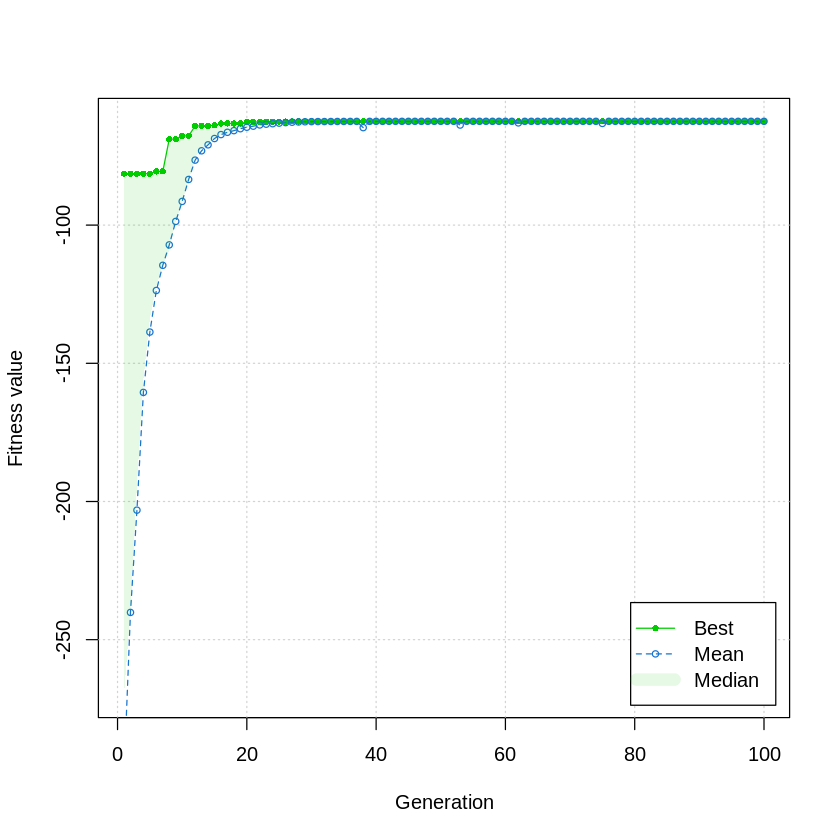

In [256]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -func1(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         maxiter=100, popSize=50, pcrossover=0.75, pmutation=0.001)

summary(GA)
plot(GA)

For this trial, I run the algorithm using only the fitness that takes into account the cross sectional area of the beam. The lowest this function can go, given the constraints of the parameters, is just under 30. To reach this value, the algorithm tends to minimize all four parameters. Increasing both the population size and number of generations improves the algorithms chances of finding the lowest possible fitness value.

---
### Static Deflection fitness function:

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.006770898 
Solution = 
           x1       x2       x3       x4
[1,] 79.13755 47.64624 3.116943 4.971062

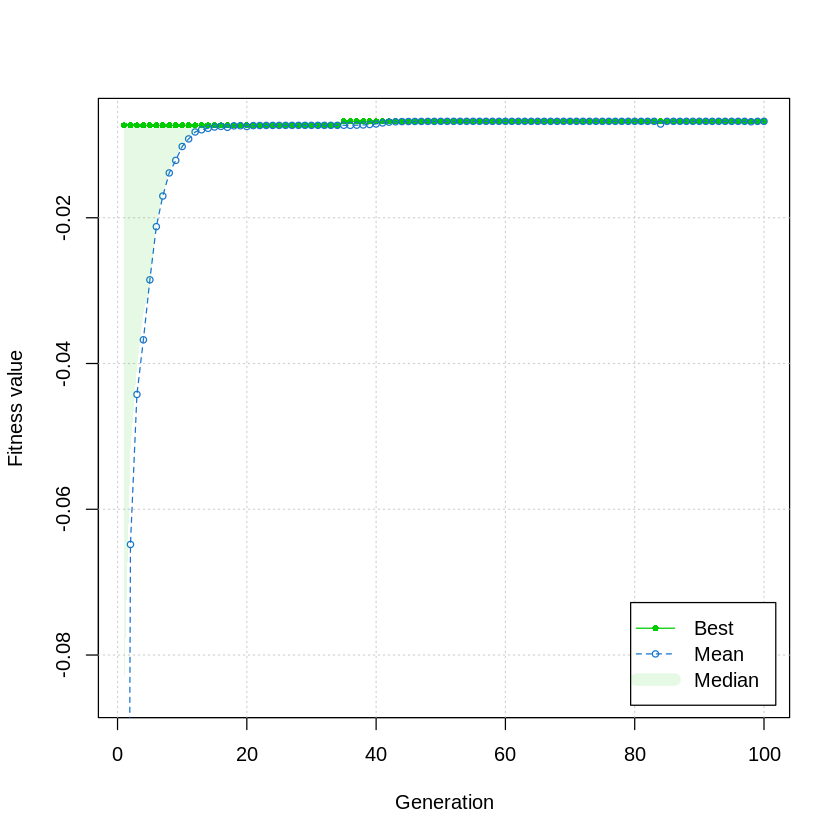

In [255]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -func2(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         maxiter=100, popSize=50, pcrossover=0.75, pmutation=0.001)

summary(GA)
plot(GA)

For this trial, I run the algorithm using only the fitness that takes into account the static deflection of the beam. This function seems to be able to well below zero. To acheive a minimum value, the algorithm tends to maximize all four parameters. Increasing both the population size and number of generations again improves the algorithms chances of finding the lowest possible fitness value.

---
### Weighted fitness function:

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4 x5
lower 10 10 0.9 0.9  0
upper 80 50 5.0 5.0  1

GA results: 
Iterations             = 100 
Fitness function value = -0.7677333 
Solution = 
           x1       x2       x3       x4          x5
[1,] 40.36502 24.43887 1.855003 1.427874 0.004477004

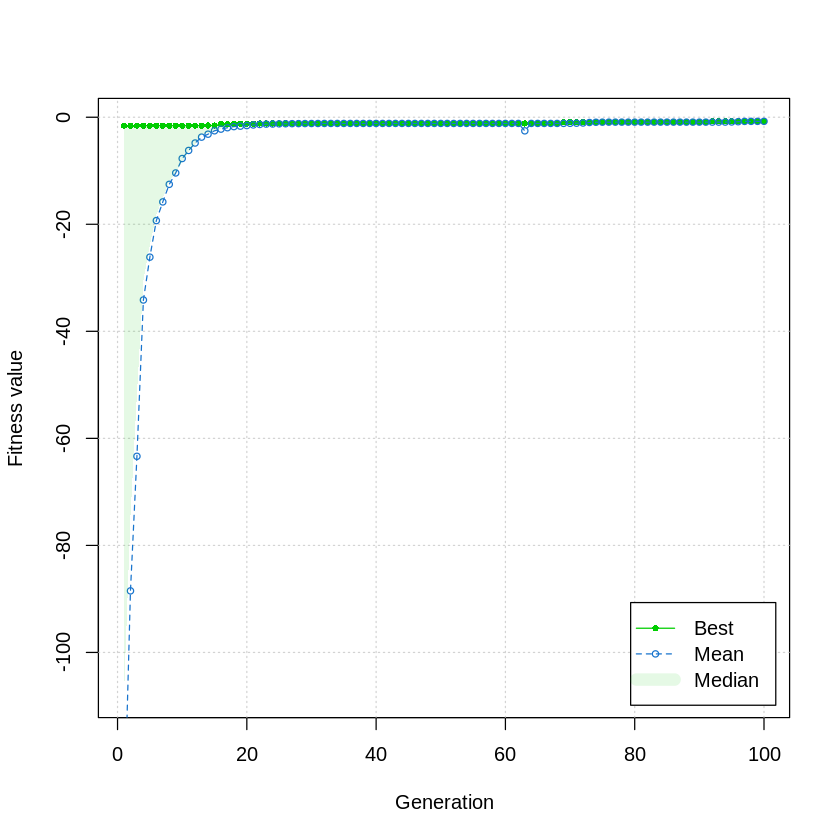

In [254]:
GA <- ga(type = "real-valued",
         fitness =  function(x) -func(x[5], func1(x[1], x[2], x[3], x[4]), func2(x[1], x[2], x[3], x[4])),
         lower = c(10, 10, 0.9, 0.9, 0), upper = c(80, 50, 5.0, 5.0, 1),
         maxiter=100, popSize=50, pcrossover=0.75, pmutation=0.001)

summary(GA)
plot(GA)

In this trial, I used a linear combination of the two previous fitness functions being sure their coefficients sum up to one. Initially, I began testing the algorithm with my own weights that I fed to the function directly. (1, 0) gives the same results as the cross section area fitness function, and (0, 1) gives the same results as the static deflection fitness function.

(0.5, 0.5) gives very similar results to the cross section fitness as well. This is because the best result for this fitness function is several magnitutes higher than for the static deflection fitness function, so it has a much greater impact on their combined fitness. With equal wights, the cross sectional area is going to be heavily favored.

Having a best fitness value difference of several magnitutes, the weights must also be several magnitutes different. (0.01, 0.99) provides an interesting result. Each parameter remains low, favoring cross section, except for x1, the height of the beam. This parameter has increased to be closer to its max value. The height of the beam, therefore, provides the largest contribution to structural stability relative to its contribution to the area of the cross section.

Parameters x2 and x4 are next to increase with a difference of weights two magnitutes greater: (0.0001, 0.9999). Then finally x3 with a difference of weights two additional magnitutes greater: (0.000001, 0.999999). The width of the center of the beam, therefore, has the smallest contribution to structural stability relative to its contribution to the area of the cross section.

Making the weights a parameter to be calculated by the algorithm will show us what weights we are to apply to get the lowest possible fitness of the weighted funtion. This is useful if the outputs of both of the functions are given in the same units, or will be emphasized to the same degree in the given project. In our case, if this condition is true, the cross sectional area should turn out to be the main focus of the GA since this produces a best fitness much greater than that of the static deflection given our constraints. When running the algorithm, it gives us weights similar to (0.001, 0.999), or within the same difference in magnitutes, agreeing with these predictions. The lower parameters are prioritized. x1, however, is increased to close to its max value to gain the benefits of high structural security without costing too much in cross sectional area.